### Images Analysis of CT images


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = np.load('data/full_archive.npz')

In [9]:
data.keys()

['image', 'idx']

In [27]:
image_index = data['idx']
images = data['image']


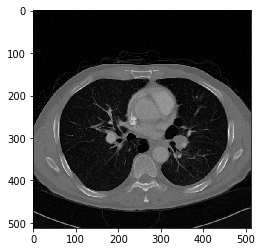

In [29]:
n= 150
plt.imshow(images[n], cmap = 'gray')

This is how the images look like in the set.I run some basic image analysis inspired by the [notebook](https://www.kaggle.com/stkbailey/teaching-notebook-for-total-imaging-newbies) on image analysis Amber shared with us. A great way to start would be classical image analysis to detect individual components in an image as a part of the analysis and processing pipeline.

### Removal of background

In [30]:
sample_image = images[n]
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(sample_image)
mask = np.where(sample_image > thresh_val, 1, 0)

# Make sure the larger portion of the mask is considered background
if np.sum(mask==0) < np.sum(mask==1):
    mask = np.where(mask, 0, 1)

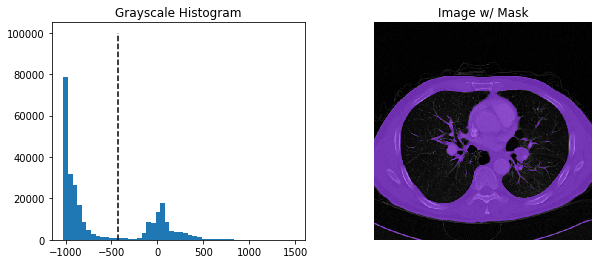

In [31]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
im_pixels = sample_image.flatten()
plt.hist(im_pixels,bins=50)
plt.vlines(thresh_val, 0, 100000, linestyle='--')
#plt.ylim([0,50000])
plt.title('Grayscale Histogram')

plt.subplot(1,2,2)
mask_for_display = np.where(mask, mask, np.nan)
plt.imshow(sample_image, cmap='gray')
plt.imshow(mask_for_display, cmap='rainbow', alpha=0.5)
plt.axis('off')
plt.title('Image w/ Mask')

plt.show()

### Detection of Objects

In [32]:
from scipy import ndimage
labels, nlabels = ndimage.label(mask)

label_arrays = []
for label_num in range(1, nlabels+1):
    label_mask = np.where(labels == label_num, 1, 0)
    label_arrays.append(label_mask)

print('There are {} separate components / objects detected.'.format(nlabels))

There are 103 separate components / objects detected.


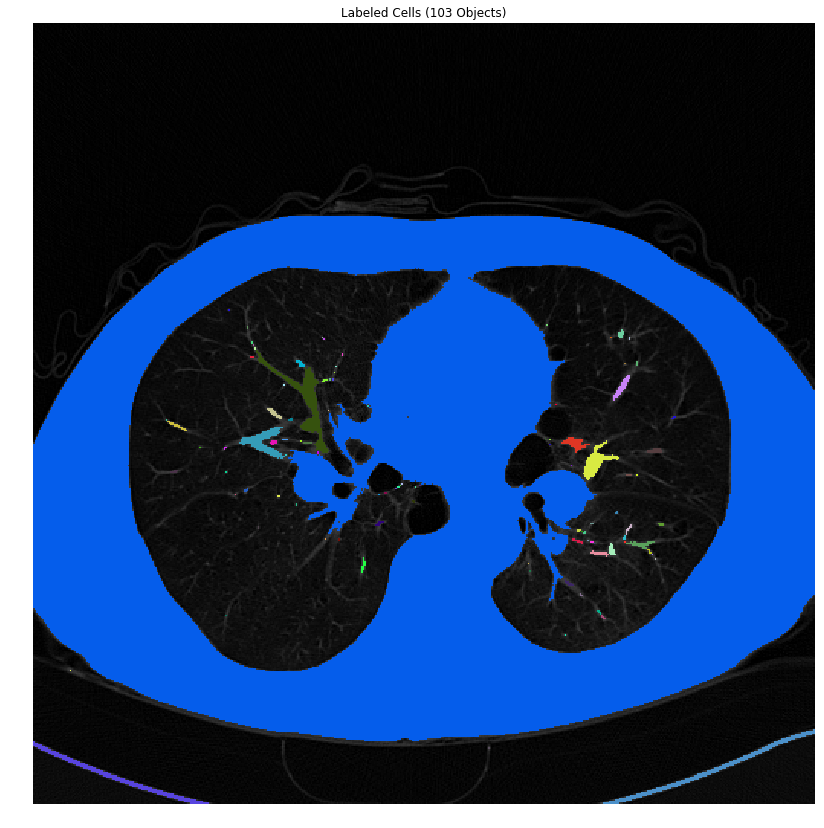

In [33]:
# Create a random colormap
from matplotlib.colors import ListedColormap
rand_cmap = ListedColormap(np.random.rand(256,3))
plt.figure(figsize = (14,18))
labels_for_display = np.where(labels > 0, labels, np.nan)
plt.imshow(sample_image, cmap='gray')
plt.imshow(labels_for_display, cmap=rand_cmap)
plt.axis('off')
plt.title('Labeled Cells ({} Objects)'.format(nlabels))
plt.show()

Things that can be possibly done with these images:
- Since there is no useful label as yet (the only label is contrast which I am not sure is a medical term or just the image contrast), we can try some unsupervised learning on the algorithms.
- Doing some basic clustering of the images where similar images can be grouped together. I have to think about how this can be done, but I am sure this is a standard thing, will need to do some research!